**Market Segmentation Analysis Fast Food Case Study**

**Step 1: Deciding (not) to Segment**
McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy

**Step 2: Specifying the Ideal Target Segment**
McDonald’s management needs to decide which key features make a market segment attractive to them. In terms of knock-out criteria, the target segment or target
segments must be homogeneous (meaning that segment members are similar to one
another in a key characteristic), distinct (meaning that members of the segments
differ substantially from members of other segments in a key characteristic), large
enough to justify the development and implementation of a customised marketing
mix, matching the strengths of McDonald’s (meaning, for example, that they must
be open to eating at fast food restaurants rather than rejecting them outright),
identifiable (meaning that there must be some way of spotting them among other
consumers) and, finally, reachable (meaning that channels of communication and
distribution need to exist which make it possible to aim at members of the target
segment specifically).
In terms of segment attractiveness criteria, the obvious choice would be a
segment that has a positive perception of McDonald’s, frequently eats out and likes
fast food. But McDonald’s management could also decide that they not only wish
to solidify their position in market segments in which they already hold high market
shares, but rather wish to learn more about market segments which are currently not
fond of McDonald’s; try to understand which perceptions are responsible for this;
and attempt to modify those very perceptions.
Given that the fast food data set in this case study contains very little information
beyond people’s brand image of McDonald’s, the following attractiveness criteria
will be used: liking McDonald’s and frequently eating at McDonald’s. These
segment attractiveness criteria represent key information in Step 8 where they
inform target segment selection.

Necessary packages

In [ ]:
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

**Step 3 : Data Collection**

The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study conducted in preparation of the survey study. For each of those attributes, respondents
provided either a YES response (indicating that they feel McDonald’s possesses
this attribute), or a NO response (indicating that McDonald’s does not possess this
attribute).

**Step 4 : Data Exploration**

In [ ]:
data = pd.read_csv("/content/Dataset_Case_Study.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
data.shape

(1453, 15)

In [ ]:
data['Age'].value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [ ]:
data['cheap'].value_counts()

Yes    870
No     583
Name: cheap, dtype: int64

In [ ]:
data['healthy'].value_counts()

No     1164
Yes     289
Name: healthy, dtype: int64

PCA

In [ ]:
data_1 = data.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)
data_1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [ ]:
#Label Encoder to data_1
encoded = data_1.apply(LabelEncoder().fit_transform)
encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:
pca_data = preprocessing.scale(encoded)
pca = PCA(n_components=11)
p = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
var1 = pd.DataFrame(data = p, columns = names)
var1.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [ ]:
#variance
pca.explained_variance_ratio_


array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [ ]:
# Correlation coefficient between variables and the components
loadings = pca.components_
num_p = pca.n_features_
p_list = ["P"+str(i) for i in list(range(1, num_p+1))]
loadings_data = pd.DataFrame.from_dict(dict(zip(p_list, loadings)))
loadings_data['feature'] = encoded.columns.values
loadings_data = loadings_data.set_index('feature')
loadings_data


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


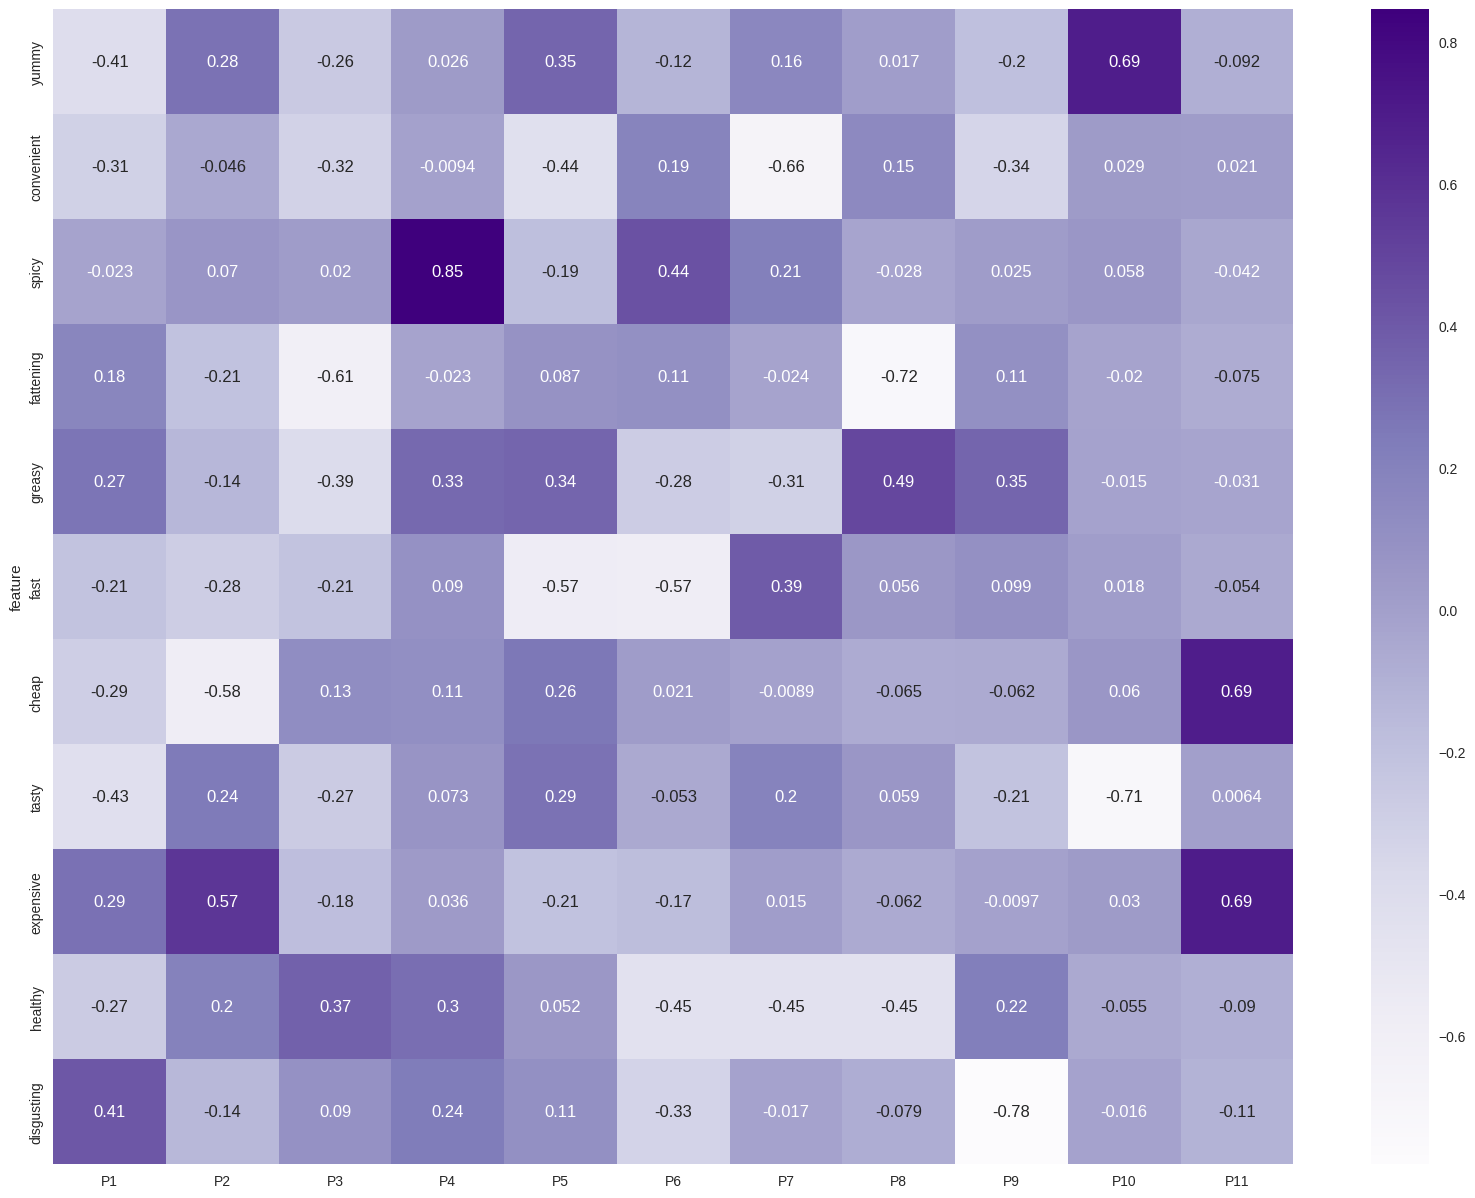

In [ ]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_data, annot=True, cmap='Purples')
plt.show()

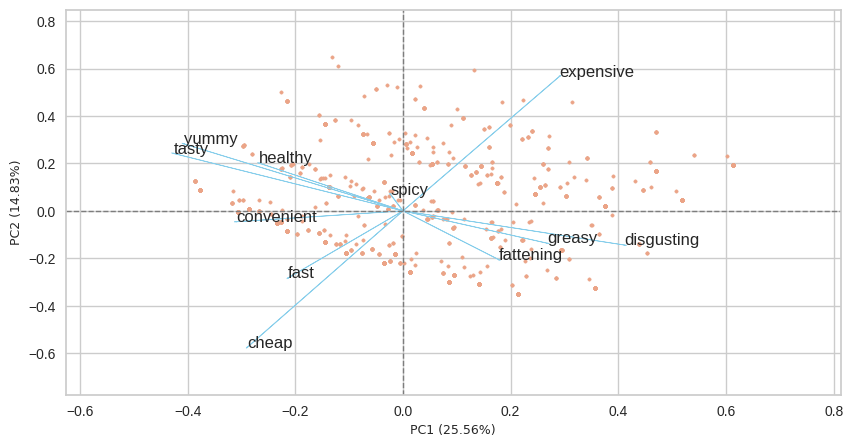

In [ ]:
pca_val = PCA().fit_transform(pca_data)
cluster.biplot(cscore=pca_val, loadings=loadings, labels=data.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

**Step 5 : Extracting Segments**

In [ ]:
# k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(encoded)
data['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS)
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558923
No. of iterations:  7
Cluster centroids:  [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size:  Counter({1: 580, 0: 323, 2: 304, 3: 246})


**Step 7: Describing Segments**

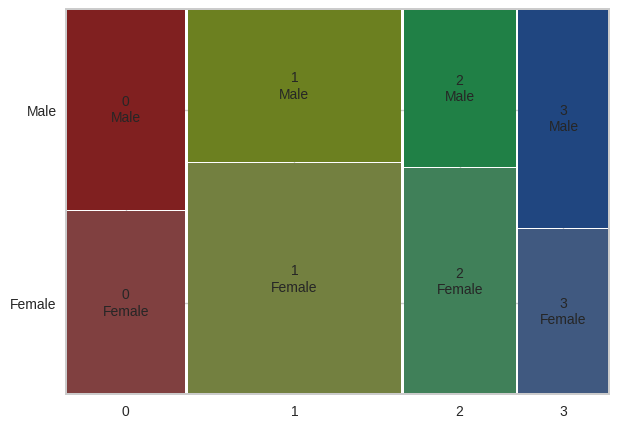

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,42,60,66,47,7,6,7,3,36,5,44
1,65,90,143,111,13,6,2,4,43,4,99
2,31,31,12,2,25,28,34,36,51,54,0
3,14,6,8,0,13,19,30,28,39,89,0


None

In [ ]:
# crosstab creation
crosstab_gender = pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

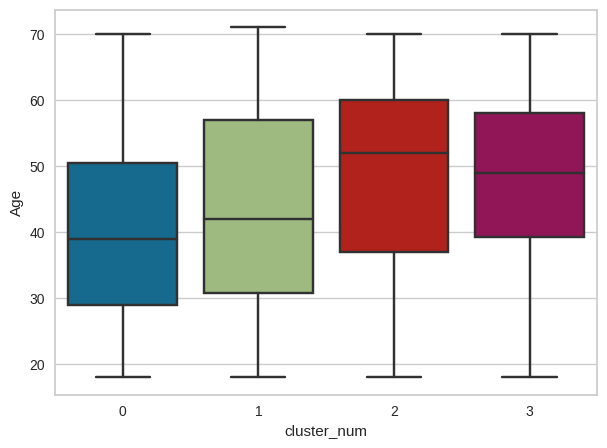

In [ ]:
sns.boxplot(x="cluster_num", y="Age", data=data);


**Step 8: Selecting (the) Target Segment(s)**

In [ ]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [ ]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [ ]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [ ]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


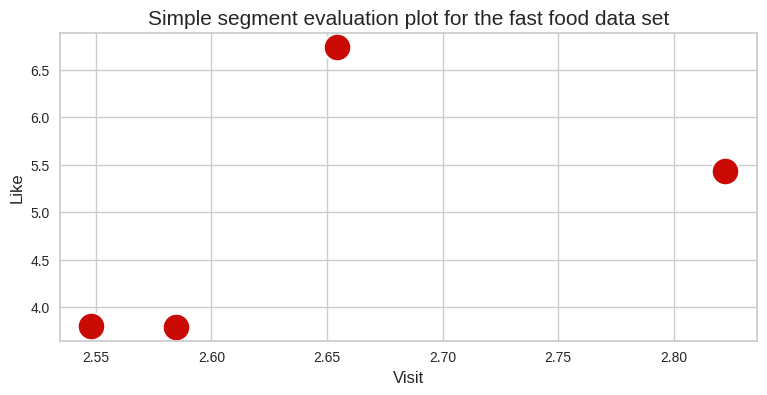

In [ ]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()


**Step 9: Customising the Marketing Mix**

In Step 9 the marketing mix is designed. If, for example, McDonald’s managers
decide to focus on segment 3 (young customers who like McDonald’s, think the
food is yummy and tasty, but perceive it as pretty expensive), they could choose to
offer a MCSUPERBUDGET line to cater specifically to the price expectations of this
segment (4Ps: Price). The advantage of such an approach might be that members
of segment 3 develop to become loyal customers who, as they start earning more
money, will not care about the price any more and move to the regular McDonald’s
range of products. To not cannibalise the main range, the product features of the
MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). Next,
communication channels would have to be identified which are heavily used by
members of segment 3 to communicate the availability of the MCSUPERBUDGET
line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same
given that all McDonald’s food is sold in McDonald’s outlets. But McDonald’s
management could consider having a MCSUPERBUDGET lane where the wait in the
queue might be slightly longer in an attempt not to cannibalise the main product line.


**Step 10:  Evaluation and Monitoring**



After the market segmentation analysis is completed, and all strategic and tactical
marketing activities have been undertaken, the success of the market segmentation
strategy has to be evaluated, and the market must be carefully monitored on a
continuous basis. It is possible, for example, that members of segment 3 start earning
more money and the MCSUPERBUDGET line is no longer suitable for them. Changes
can occur within existing market segments. But changes can also occur in the
larger marketplace, for example, if new competitors enter the market. All potential
sources of change have to be monitored in order to detect changes which require
McDonald’s management to adjust their strategic or tactical marketing in view of
new market circumstances.
